# Author
- Jiapeng Sun
- jsun@student.chalmers.se

- Hao Xu
- xhao@student.chalmers.se

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz -O as2_data.tar.gz
!tar -xzf as2_data.tar.gz

--2021-05-07 15:49:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72856320 (69M) [application/x-httpd-php]
Saving to: ‘as2_data.tar.gz’

as2_data.tar.gz     100%[===================>]  69.48M  17.1MB/s    in 4.1s    

2021-05-07 15:50:03 (17.1 MB/s) - ‘as2_data.tar.gz’ saved [72856320/72856320]



# Question 1 - Cluster Exploration

## Taks 1 Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_data = pd.read_csv("./TCGA-PANCAN-HiSeq-801x20531/data.csv",index_col=0)

In [4]:
df_data.shape

(801, 20531)

In [5]:
df_data.head()

gene_0    gene_1    gene_2  ...  gene_20528  gene_20529  gene_20530
sample_0     0.0  2.017209  3.265527  ...    8.921326    5.286759         0.0
sample_1     0.0  0.592732  1.588421  ...    9.397854    2.094168         0.0
sample_2     0.0  3.511759  4.327199  ...   10.090470    1.683023         0.0
sample_3     0.0  3.663618  4.507649  ...    9.684365    3.292001         0.0
sample_4     0.0  2.655741  2.821547  ...    9.461191    5.110372         0.0

[5 rows x 20531 columns]

### 1.1 Missing Value

- From UCL webpage, missing values are labeled as N/A.
- By checking, there is no missing values.

In [6]:
df_data = df_data.replace('N/A',np.NaN)
df_data.isnull().sum().sum()

0

### 1.2 Means and Variances

- The value from different features shows a widely varies as a widely range of mean value from 0 to more than 15.

- Most value from same feature shows a small varies with variance close to 0, but some of them has a big variance can be more than 40.

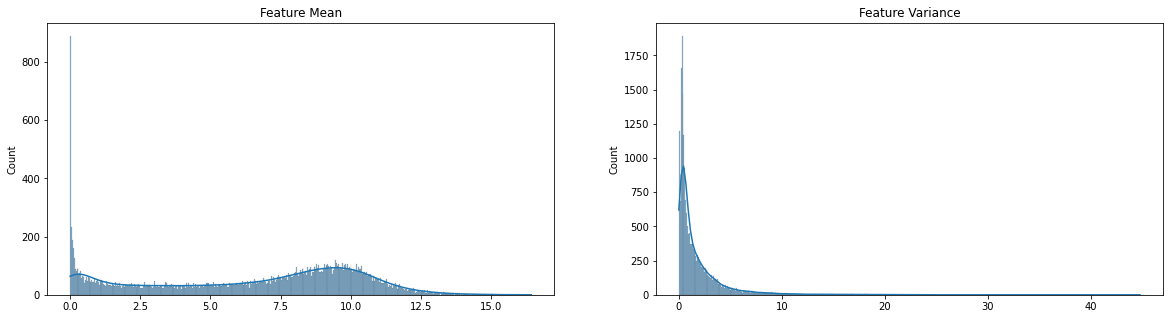

In [7]:
mu_data = df_data.mean()
var_data = df_data.var()

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.histplot(mu_data,kde=True,bins=500).set_title('Feature Mean')
plt.subplot(122)
sns.histplot(var_data,kde=True,bins=500).set_title('Feature Variance')
plt.show()

### 1.3 Constant Features

- There are 267 features with 0 variance, which means constant.

In [8]:
var_data[var_data == 0]

gene_5        0.0
gene_23       0.0
gene_4370     0.0
gene_4808     0.0
gene_4809     0.0
             ... 
gene_18915    0.0
gene_19450    0.0
gene_19451    0.0
gene_19452    0.0
gene_19671    0.0
Length: 267, dtype: float64

## Taks 2 Variance filtering

- By filtering out all features with variance less than 2.2 we keep 5071 features left for future use.

- Sice we are going to perform PCA next, we would like to center and standardize the data, because this can minimize the impact from the distribution of specific feature.

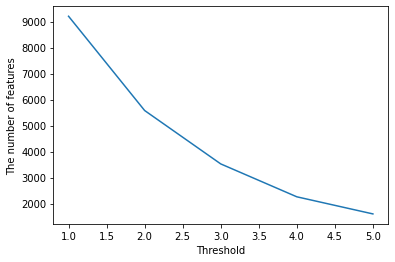

In [9]:
from sklearn.feature_selection import VarianceThreshold

threshold = [1, 2, 3, 4, 5]
number_of_features = []

for i in threshold:
  vt = VarianceThreshold(threshold=i)
  vt.fit(df_data)
  df_vt = vt.transform(df_data)
  number_of_features.append(df_vt.shape[1])

plt.figure()
plt.plot(threshold, number_of_features)
plt.xlabel('Threshold')
plt.ylabel('The number of features')
plt.show()

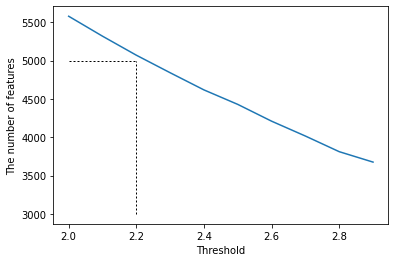

In [10]:
deeper_threshold = np.arange(2, 3, 0.1)
number_of_features = []

for i in deeper_threshold:
  vt = VarianceThreshold(threshold=i)
  vt.fit(df_data)
  df_vt = vt.transform(df_data)
  number_of_features.append(df_vt.shape[1])

plt.figure()
plt.plot(deeper_threshold, number_of_features)
plt.xlabel('Threshold')
plt.ylabel('The number of features')
plt.plot([2.2, 2.2], [3000, 5000], 'k-', lw=1,dashes=[2, 2])
plt.plot([2.0, 2.2], [5000, 5000], 'k-', lw=1,dashes=[2, 2])
plt.show()

In [ ]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=2.2)
vt.fit(df_data)

np_vt = vt.transform(df_data)
# df_vt = pd.DataFrame(np_vt,columns=vt.get_support())
np_vt.shape

(801, 5071)

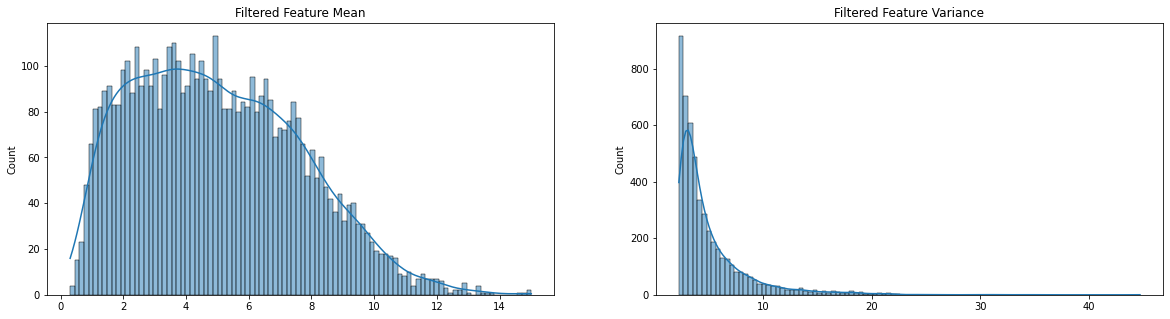

In [ ]:
mu_vt = np_vt.mean(axis=0)
var_vt = np_vt.var(axis=0)

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.histplot(mu_vt,kde=True,bins=100).set_title('Filtered Feature Mean')
plt.subplot(122)
sns.histplot(var_vt,kde=True,bins=100).set_title('Filtered Feature Variance')
plt.show()

## Taks 3 Principal Component Analysis

### 3.1 Perform PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ss = StandardScaler()
ss.fit(np_vt)
np_ss = ss.transform(np_vt)

pca = PCA(n_components=50)
pca.fit(np_ss)
np_pca = pca.transform(np_ss)

### 3.2 Pair Plot

- From the pair plot of first 4 components, we see that there is some pattens shows there could be 2 to 4 clusters, for example:
    - Component 3 to 0 shows likely 2 clusters
    - Component 2 to 1 shows likely 3 clusters
    - Component 3 to 1 shows likely 4 clusters

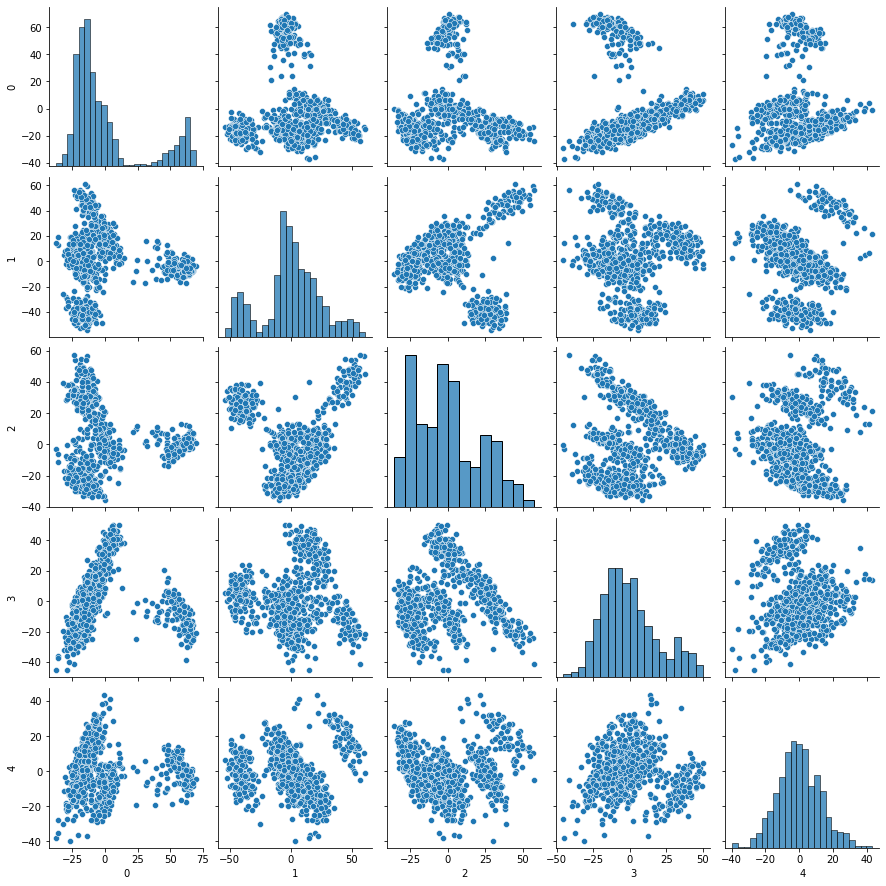

In [ ]:
sns.pairplot(pd.DataFrame(np_pca[:,0:5]))

### 3.3 Scree Plot

- From the scree plot we see there is an elbow at around 5
- It shows a potential that we may keep only first 5 components from the PCA, so we will performn PCA again before next steps.

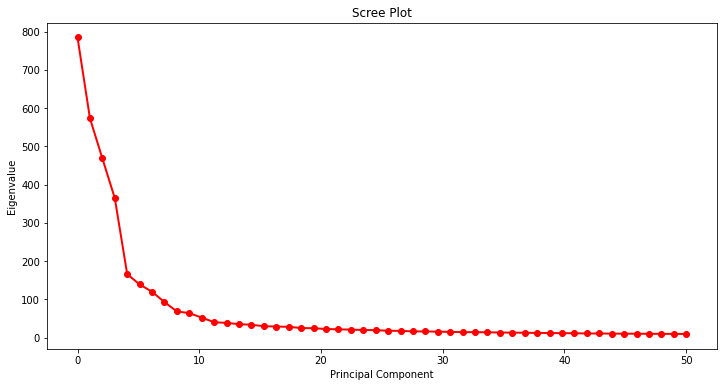

In [ ]:
x = np.linspace(0,50,50)
y = pca.explained_variance_
plt.figure(figsize=(12,6))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.plot(x, y, 'ro-', linewidth=2)
plt.show()

In [ ]:
pca_5 = PCA(n_components=5)
pca_5.fit(np_ss)
np_pca_5 = pca_5.transform(np_ss)

## Task 4 Clustering

- We take such scores in evaluation

    - Silhouette Score
    - Davies Bouldin Score
    - Calinski Harabasz Score

- As invesgation, besides visulazing with pair plot, we also make a 3D plot based on the first 3 components.

In [ ]:
df_pca_5 = pd.DataFrame(np_pca_5)
df_pca_5.columns = ['Cpnt1','Cpnt2','Cpnt3','Cpnt4','Cpnt5']
df_pca_5.head()

Cpnt1      Cpnt2      Cpnt3      Cpnt4      Cpnt5
0 -20.536573 -39.605085  27.026740   7.519038  -1.253647
1  -1.703527  35.554901  -2.252613  19.662346 -21.237741
2 -26.944853   2.995044  30.175370 -31.260508 -39.540455
3 -29.924360 -27.954171  28.644093 -10.136862 -18.014983
4 -27.296967  -4.393025 -21.940561 -19.092111   2.463759

In [ ]:
n_clus_list = np.linspace(2,10,9).astype(int)

### 4.1 K-Means

- Conster the result form 3 different evaluations scores, we take 5 as the final number of clusters.

In [ ]:
from sklearn.cluster import KMeans

km_label = []

for n_clus in n_clus_list:
    kmeans = KMeans(
        n_clusters = n_clus
        , n_init = 50
        , random_state = n_clus
        ).fit(np_pca_5)
    km_label.append(kmeans.labels_)

df_km_label = pd.DataFrame(km_label).T
df_km_label.columns = n_clus_list.astype(str)
df_km_result = pd.concat([df_pca_5,df_km_label],axis=1)

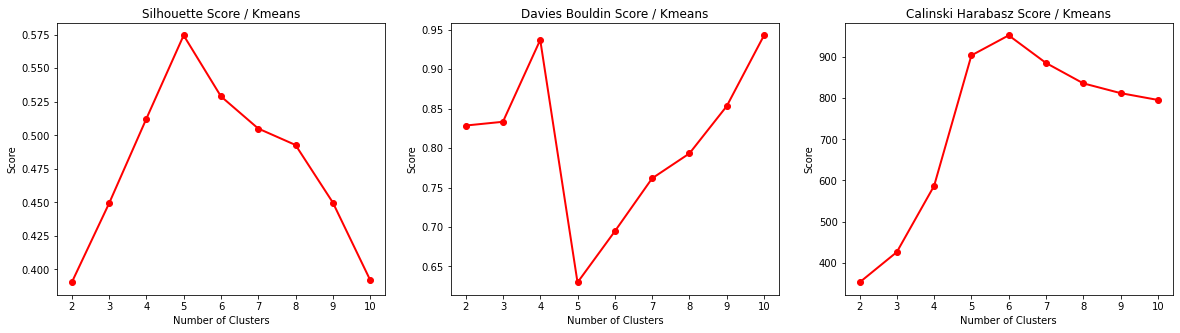

In [ ]:
from sklearn.metrics import silhouette_score
# The higher, the better
from sklearn.metrics import davies_bouldin_score
# The lower, the better
from sklearn.metrics import calinski_harabasz_score
# The higher, the better

ss_score = []
dbs_score = []
chs_score = []

for cur_clu in n_clus_list.astype(str):
    s_score = silhouette_score(df_pca_5,df_km_label[cur_clu])
    d_score = davies_bouldin_score(df_pca_5,df_km_label[cur_clu])
    c_score = calinski_harabasz_score(df_pca_5,df_km_label[cur_clu])

    ss_score.append(s_score)
    dbs_score.append(d_score)
    chs_score.append(c_score)

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.set_title('Silhouette Score / Kmeans')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Score')
ax1.plot(n_clus_list, ss_score, 'ro-', linewidth=2)

ax2 = fig.add_subplot(132)
ax2.set_title('Davies Bouldin Score / Kmeans')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Score')
ax2.plot(n_clus_list, dbs_score, 'ro-', linewidth=2)

ax3 = fig.add_subplot(133)
ax3.set_title('Calinski Harabasz Score / Kmeans')
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Score')
ax3.plot(n_clus_list, chs_score, 'ro-', linewidth=2)

plt.show()

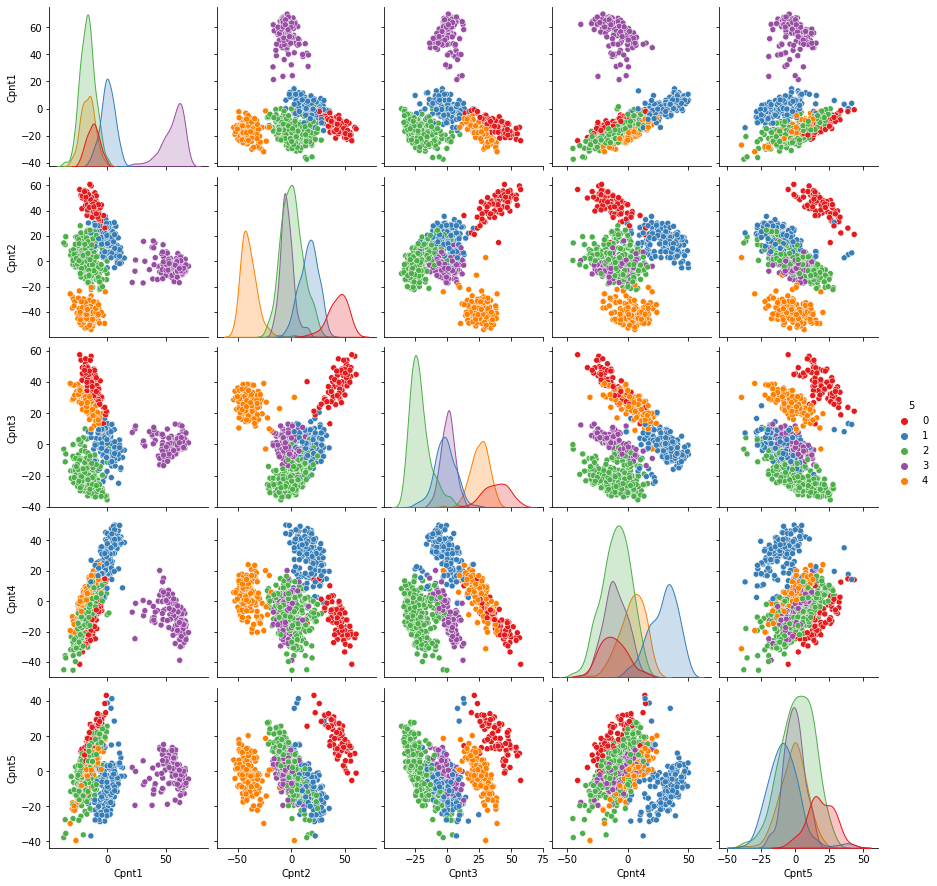

In [ ]:
sns.pairplot(
    data=df_km_result
    ,vars=df_pca_5.columns
    ,hue='5'
    ,palette='Set1'
    )

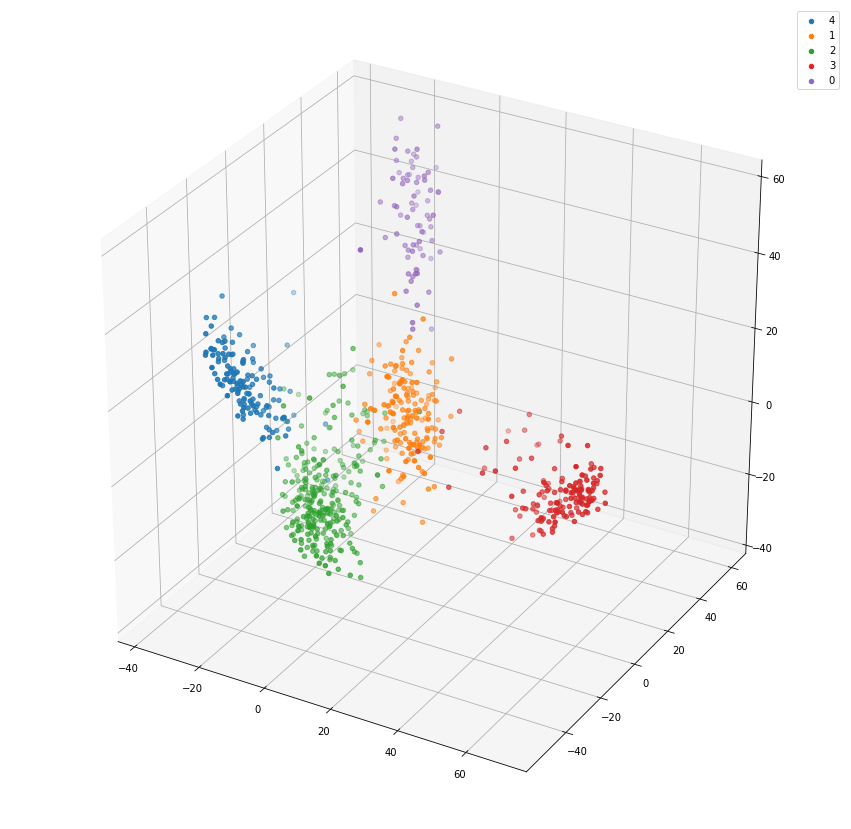

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

df = df_km_result

for s in df['5'].unique():
    ax.scatter(df.Cpnt1[df['5']==s],df.Cpnt2[df['5']==s],df.Cpnt3[df['5']==s],label=s)
    
ax.legend()

### 4.2 Gaussian Mixtures

- Conster the result form 3 different evaluations scores, we take 5 as the final number of clusters.


In [ ]:
from sklearn.mixture import GaussianMixture

gm_label = []

for n_clus in n_clus_list:
    gm = GaussianMixture(
        n_components = n_clus
        , n_init = 50
        , random_state = n_clus
        ).fit(np_pca_5)
    gm_label.append(gm.predict(np_pca_5))

df_gm_label = pd.DataFrame(gm_label).T
df_gm_label.columns = n_clus_list.astype(str)
df_gm_result = pd.concat([df_pca_5,df_gm_label],axis=1)

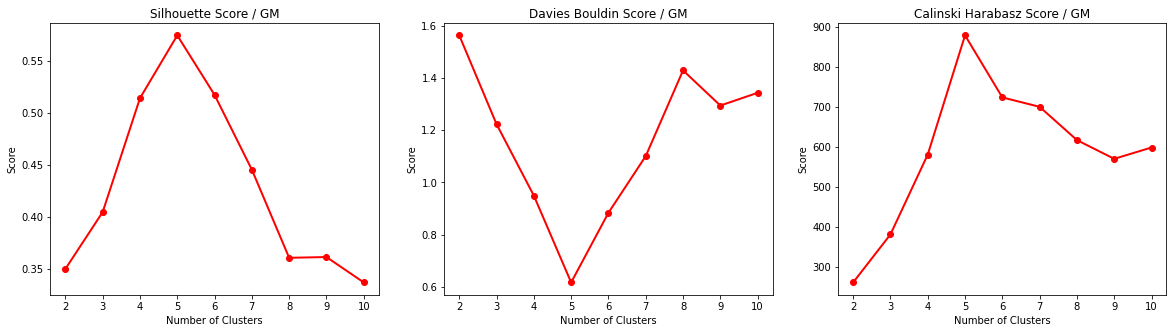

In [ ]:
from sklearn.metrics import silhouette_score
# The higher, the better
from sklearn.metrics import davies_bouldin_score
# The lower, the better
from sklearn.metrics import calinski_harabasz_score
# The higher, the better

ss_score = []
dbs_score = []
chs_score = []

for cur_clu in n_clus_list.astype(str):
    s_score = silhouette_score(df_pca_5,df_gm_label[cur_clu])
    d_score = davies_bouldin_score(df_pca_5,df_gm_label[cur_clu])
    c_score = calinski_harabasz_score(df_pca_5,df_gm_label[cur_clu])

    ss_score.append(s_score)
    dbs_score.append(d_score)
    chs_score.append(c_score)

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.set_title('Silhouette Score / GM')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Score')
ax1.plot(n_clus_list, ss_score, 'ro-', linewidth=2)

ax2 = fig.add_subplot(132)
ax2.set_title('Davies Bouldin Score / GM')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Score')
ax2.plot(n_clus_list, dbs_score, 'ro-', linewidth=2)

ax3 = fig.add_subplot(133)
ax3.set_title('Calinski Harabasz Score / GM')
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Score')
ax3.plot(n_clus_list, chs_score, 'ro-', linewidth=2)

plt.show()

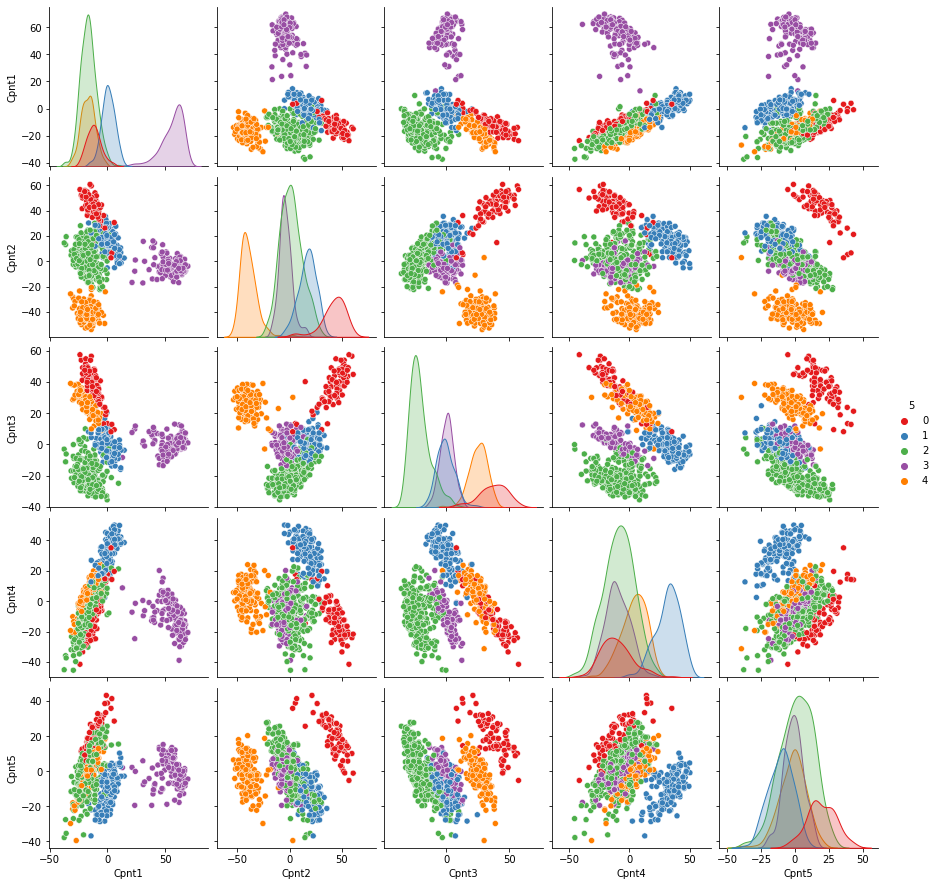

In [ ]:
sns.pairplot(
    data=df_gm_result
    ,vars=df_pca_5.columns
    ,hue='5'
    ,palette='Set1'
    )

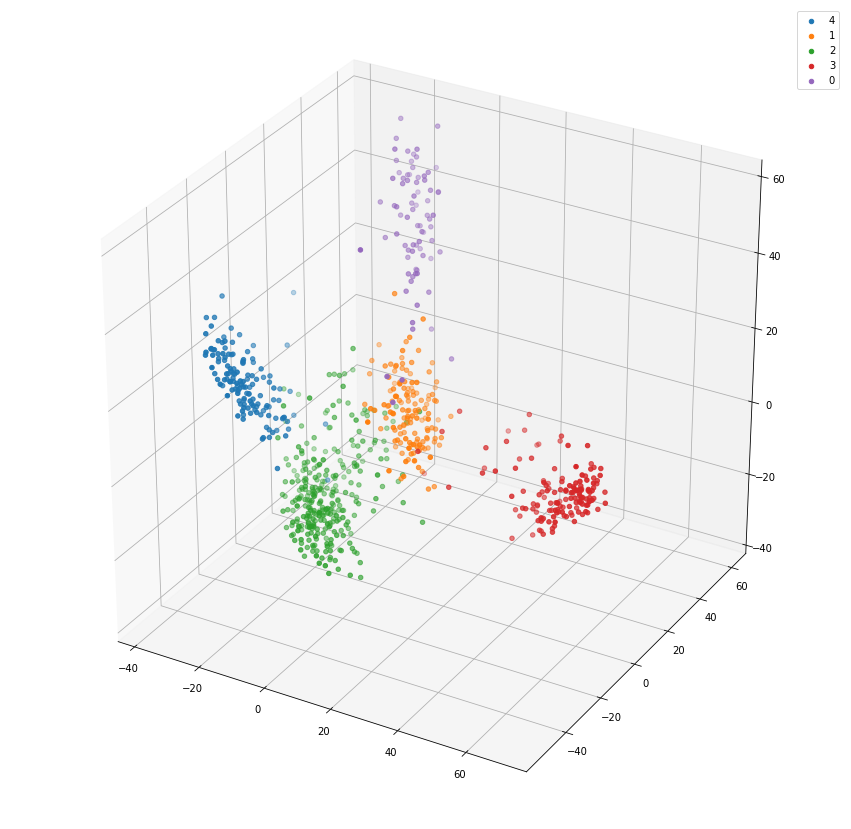

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

df = df_gm_result

for s in df['5'].unique():
    ax.scatter(df.Cpnt1[df['5']==s],df.Cpnt2[df['5']==s],df.Cpnt3[df['5']==s],label=s)
    
ax.legend()

### 4.3 DBSCAN

- Conster the result form 3 different evaluations scores, eps as 15 and min sample number as 7 for clustering.

- Based on paramters above, we got 5 clusters like other methods.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

eps_list = []
min_sample_list = []
score_ss = []
score_dbs = []
score_chs = []

for i in np.linspace(0,20,201)[1:]:
    for j in np.linspace(2,20,19):
        db = DBSCAN(eps=i, min_samples=j).fit(np_pca_5)
        if len(np.unique(db.labels_)) > 1:
            eps_list.append(i)
            min_sample_list.append(j)
            score_ss.append(silhouette_score(np_pca_5,db.labels_))
            score_dbs.append(davies_bouldin_score(np_pca_5,db.labels_))
            score_chs.append(calinski_harabasz_score(np_pca_5,db.labels_))

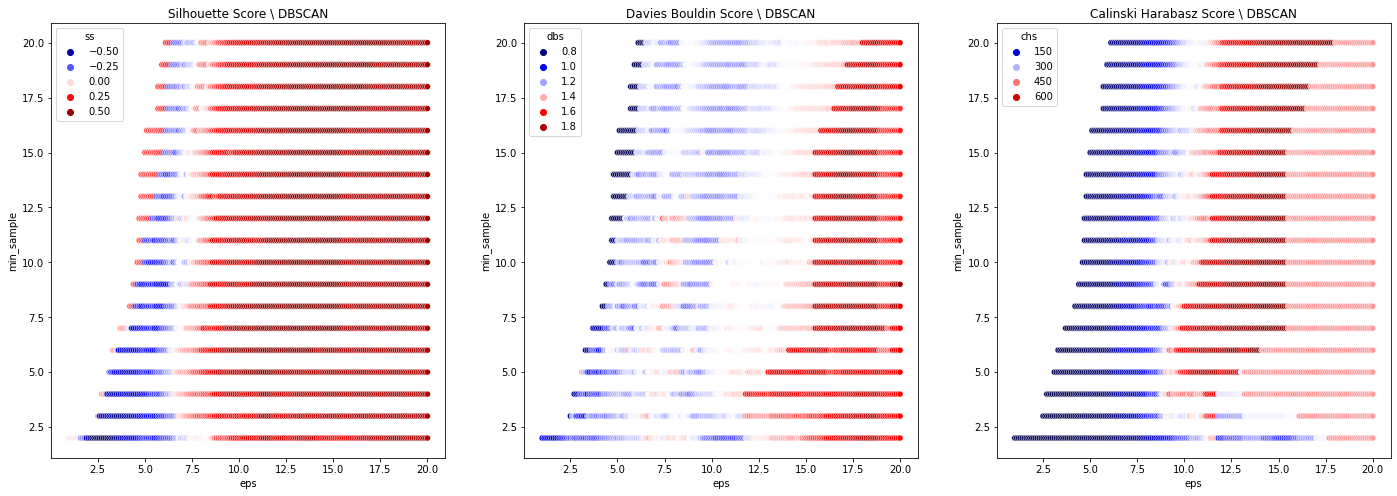

In [ ]:
db_score_resul = pd.DataFrame([eps_list,min_sample_list,score_ss,score_dbs,score_chs]).T
db_score_resul.columns=['eps','min_sample','ss','dbs','chs']

plt.figure(figsize=(24,8))
plt.subplot(131)
sns.scatterplot(x='eps',y='min_sample',hue='ss',palette='seismic',data=db_score_resul).set_title('Silhouette Score \ DBSCAN')
plt.subplot(132)
sns.scatterplot(x='eps',y='min_sample',hue='dbs',palette='seismic',data=db_score_resul).set_title('Davies Bouldin Score \ DBSCAN')
plt.subplot(133)
sns.scatterplot(x='eps',y='min_sample',hue='chs',palette='seismic',data=db_score_resul).set_title('Calinski Harabasz Score \ DBSCAN')
plt.show()

In [ ]:
ss_max = db_score_resul.iloc[db_score_resul['ss'].idxmax(),:]
dbs_min = db_score_resul.iloc[db_score_resul['dbs'].idxmin(),:]
chs_max = db_score_resul.iloc[db_score_resul['chs'].idxmax(),:]
db_res = pd.DataFrame([ss_max,dbs_min,chs_max])
db_res

eps  min_sample        ss       dbs         chs
2093  15.3         8.0  0.566550  1.419031  702.696088
102    4.3         8.0  0.149140  0.724286   15.955001
2035  15.0         7.0  0.565549  1.374934  705.215457

In [ ]:
db = DBSCAN(eps=4.3, min_samples=8).fit(np_pca_5)
np.unique(db.labels_)

array([-1,  0,  1])

In [ ]:
db = DBSCAN(eps=15, min_samples=7).fit(np_pca_5)
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4])

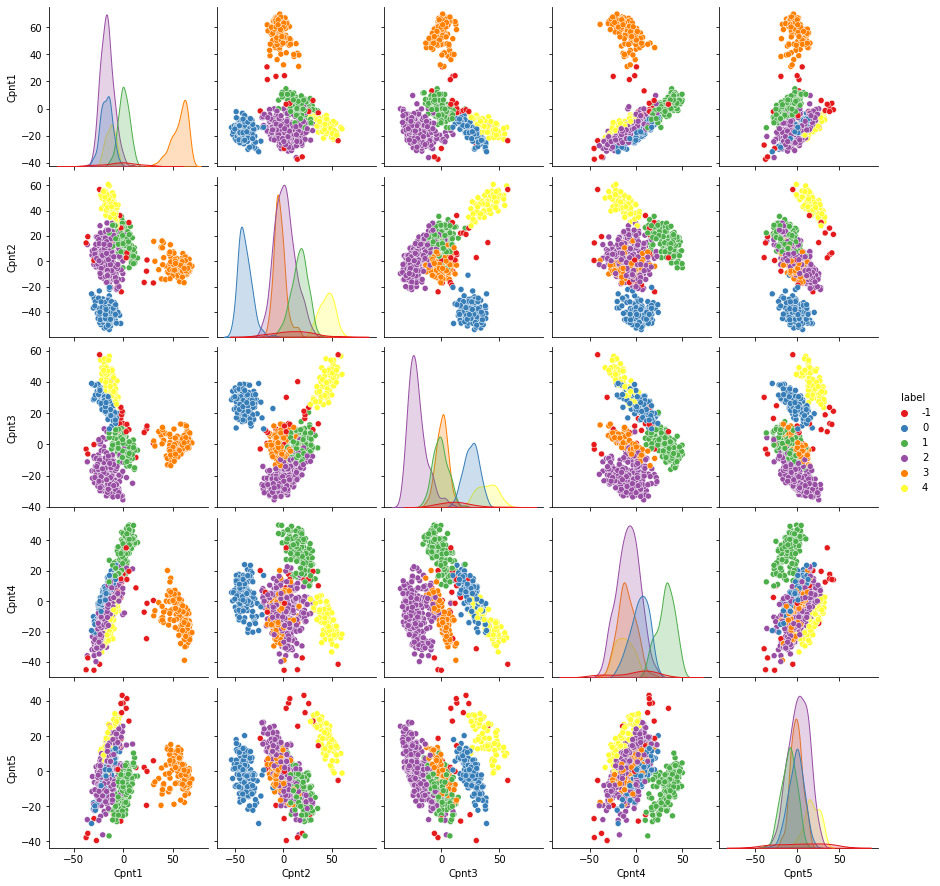

In [ ]:
df_db_result = pd.concat([df_pca_5,pd.Series(db.labels_)],axis=1)
df_db_result.columns = ['Cpnt1', 'Cpnt2', 'Cpnt3', 'Cpnt4', 'Cpnt5', 'label']

sns.pairplot(
    data=df_db_result
    ,vars=df_pca_5.columns
    ,hue='label'
    ,palette='Set1'
    )

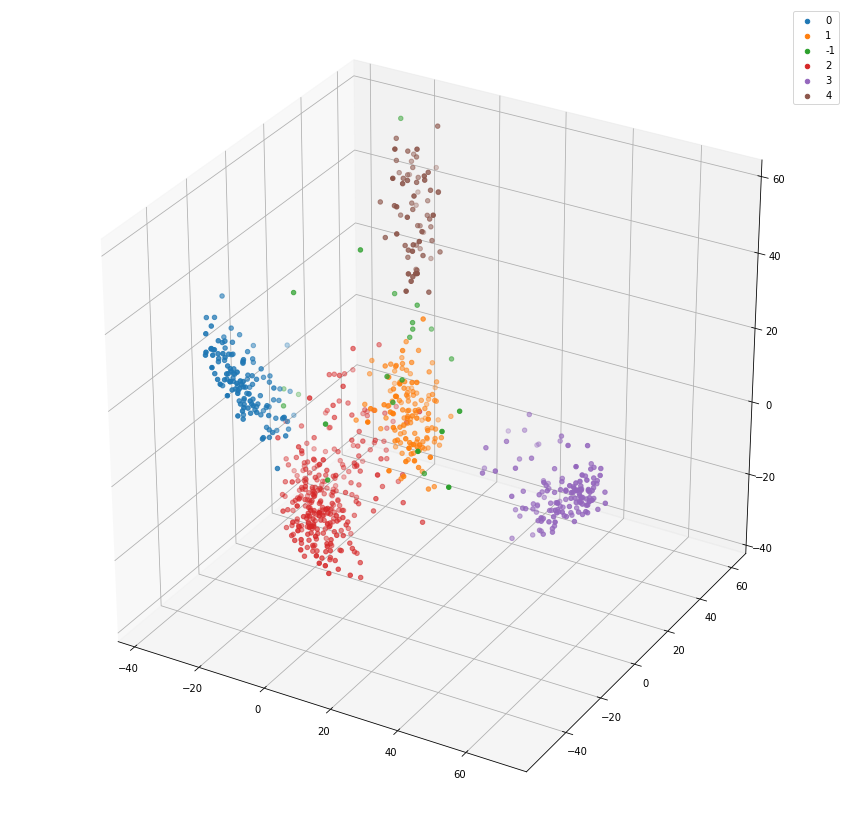

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

df = df_db_result

for s in df['label'].unique():
    ax.scatter(df.Cpnt1[df['label']==s],df.Cpnt2[df['label']==s],df.Cpnt3[df['label']==s],label=s)
    
ax.legend()

### 4.4 Hierarchical

- Conster the result form 3 different evaluations scores, we take 5 as the final number of clusters.


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_label = []

for n_clus in n_clus_list:
    agg = AgglomerativeClustering(n_clusters = n_clus).fit(np_pca_5)
    agg_label.append(agg.labels_)

df_agg_label = pd.DataFrame(agg_label).T
df_agg_label.columns = n_clus_list.astype(str)
df_agg_result = pd.concat([df_pca_5,df_agg_label],axis=1)

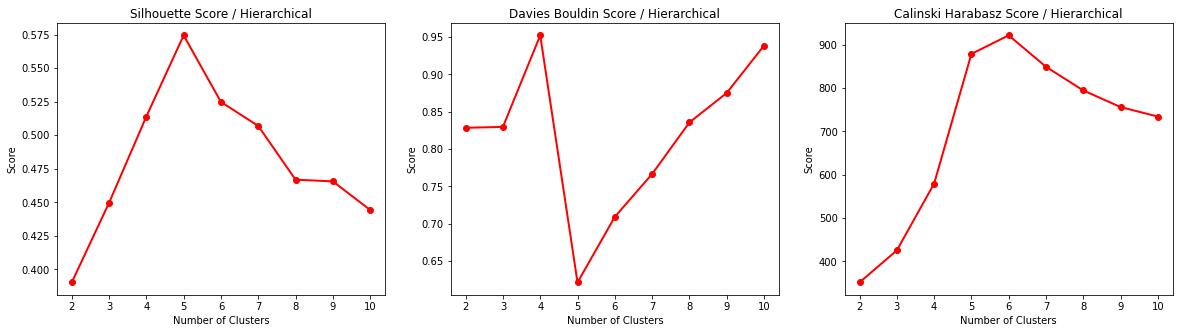

In [ ]:
from sklearn.metrics import silhouette_score
# The higher, the better
from sklearn.metrics import davies_bouldin_score
# The lower, the better
from sklearn.metrics import calinski_harabasz_score
# The higher, the better

ss_score = []
dbs_score = []
chs_score = []

for cur_clu in n_clus_list.astype(str):
    s_score = silhouette_score(df_pca_5,df_agg_label[cur_clu])
    d_score = davies_bouldin_score(df_pca_5,df_agg_label[cur_clu])
    c_score = calinski_harabasz_score(df_pca_5,df_agg_label[cur_clu])

    ss_score.append(s_score)
    dbs_score.append(d_score)
    chs_score.append(c_score)

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.set_title('Silhouette Score / Hierarchical')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Score')
ax1.plot(n_clus_list, ss_score, 'ro-', linewidth=2)

ax2 = fig.add_subplot(132)
ax2.set_title('Davies Bouldin Score / Hierarchical')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Score')
ax2.plot(n_clus_list, dbs_score, 'ro-', linewidth=2)

ax3 = fig.add_subplot(133)
ax3.set_title('Calinski Harabasz Score / Hierarchical')
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Score')
ax3.plot(n_clus_list, chs_score, 'ro-', linewidth=2)

plt.show()

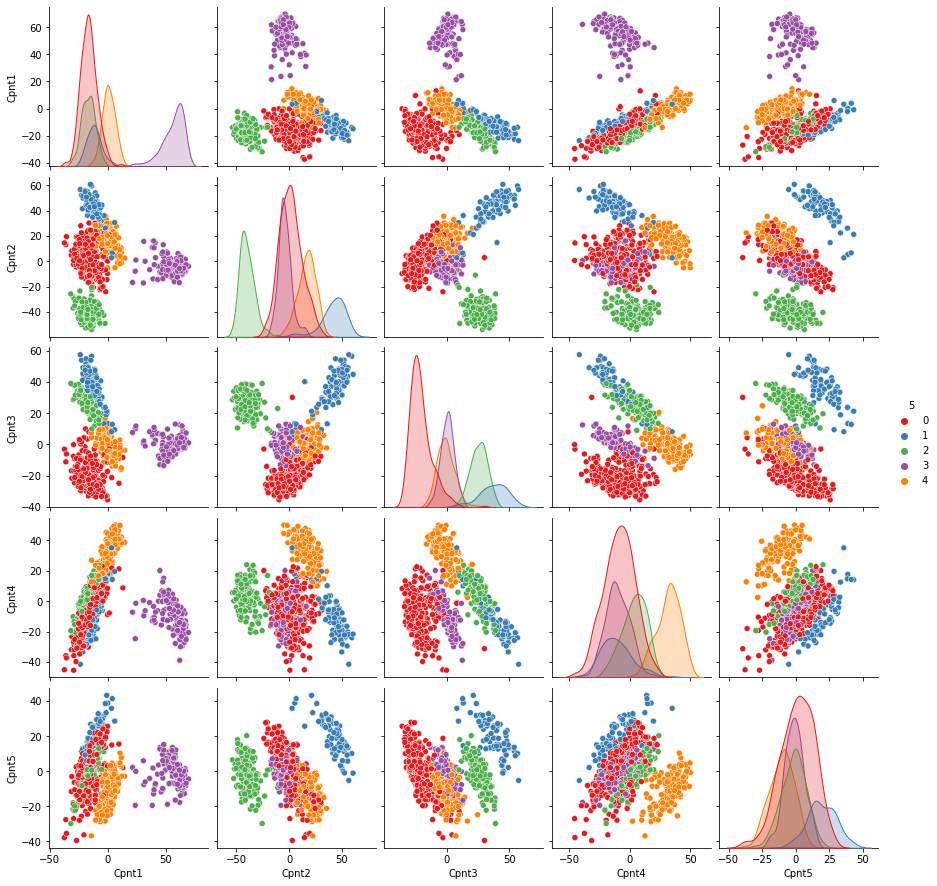

In [ ]:
sns.pairplot(
    data=df_agg_result
    ,vars=df_pca_5.columns
    ,hue='5'
    ,palette='Set1'
    )

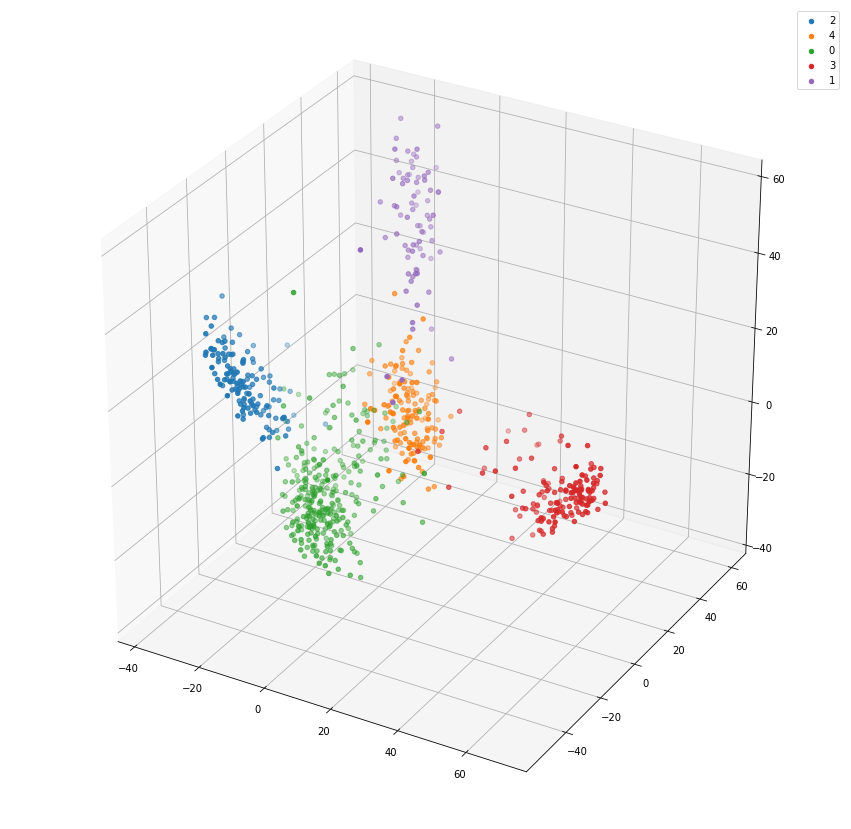

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

df = df_agg_result

for s in df['5'].unique():
    ax.scatter(df.Cpnt1[df['5']==s],df.Cpnt2[df['5']==s],df.Cpnt3[df['5']==s],label=s)
    
ax.legend()

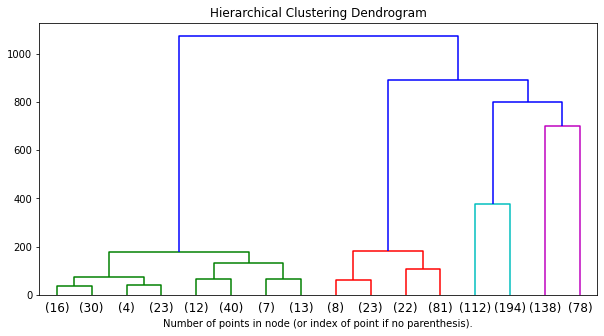

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

test = AgglomerativeClustering(n_clusters = None,distance_threshold=0).fit(np_pca_5)

plt.figure(figsize=(10,5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(test, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Question 2 - Consensus Clustering

## Task 5 Consensus Clustering

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cpnt_names = df_pca_5.columns
loc_id = np.linspace(0,len(df_pca_5)-1,len(df_pca_5)).astype(int)
df_pca_5_cc = pd.concat([df_pca_5,pd.DataFrame(loc_id,columns=['loc_id'])],axis=1)
df_pca_5_cc.head()

Cpnt1      Cpnt2      Cpnt3      Cpnt4      Cpnt5  loc_id
0 -20.536573 -39.605085  27.026740   7.519038  -1.253647       0
1  -1.703527  35.554901  -2.252613  19.662346 -21.237741       1
2 -26.944853   2.995044  30.175370 -31.260508 -39.540455       2
3 -29.924360 -27.954171  28.644093 -10.136862 -18.014983       3
4 -27.296967  -4.393025 -21.940561 -19.092111   2.463759       4

### 5.1 eCDF for Consensus Matrix

In [ ]:
from sklearn.cluster import KMeans
from IPython.display import display, clear_output

M = 25
K_list = []
ecdf_x_list = []
ecdf_y_list = []

for K in range (2,11):
    J_matrix = np.zeros([len(df_pca_5),len(df_pca_5)])
    M_matrix = np.zeros([len(df_pca_5),len(df_pca_5)])

    for m in range(M):
        clear_output(wait=True)
        display('K: '+str(K)+' M: '+str(m))

        x = df_pca_5_cc.sample(frac=0.8,replace=False)

        kmeans = KMeans(
        n_clusters = K
        , n_init = 50
        , random_state = K
        ).fit(x[cpnt_names])

        label_list = kmeans.labels_
        loc_list = x['loc_id'].tolist()
        
        for i in range(len(loc_list)):
            for j in range(len(loc_list)):
                J_matrix[loc_list[i],loc_list[j]] += 1
                if label_list[i] == label_list[j]:
                    M_matrix[loc_list[i],loc_list[j]] += 1
        
    C_matrix = M_matrix / J_matrix
    C_1D = C_matrix.flatten()
    ecdf = ECDF(C_1D)

    K_list.append(K)
    ecdf_x_list.append(ecdf.x)
    ecdf_y_list.append(ecdf.y)

'K: 10 M: 24'

In [ ]:
xk = ['x' + str(k) for k in K_list]
yk = ['y' + str(k) for k in K_list]
colk = xk + yk 
ecdf_cc = pd.concat([pd.DataFrame(ecdf_x_list).T,pd.DataFrame(ecdf_y_list).T],axis=1)

In [ ]:
ecdf_cc.columns = colk

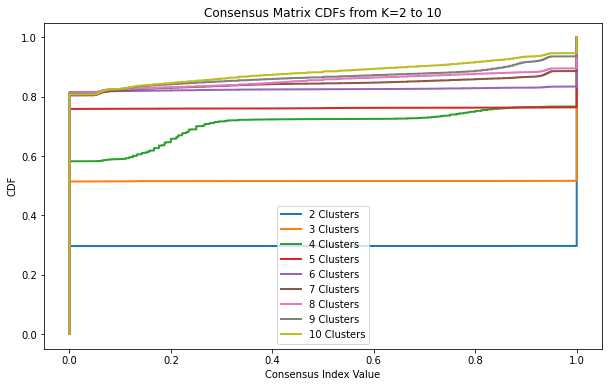

In [ ]:
plt.figure(figsize=(10,6))
for i in range(len(K_list)):
    plt.plot(xk[i],yk[i],'',data = ecdf_cc, linewidth = 2)
plt.title('Consensus Matrix CDFs from K=2 to 10')
plt.xlabel('Consensus Index Value')
plt.ylabel('CDF')
plt.legend([str(k) + ' Clusters' for k in K_list],loc='lower center')
plt.show()

### 5.2 PAC Score Rank 

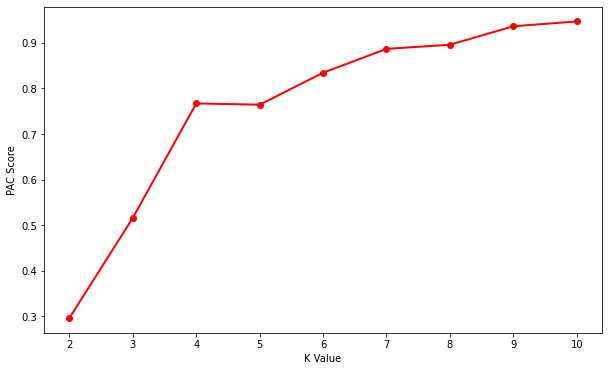

In [ ]:
PAC_list = []
q1 = 0.01
q2 = 0.99
for i in range(len(K_list)):
    fK_q1 = ecdf_cc[yk[i]][ecdf_cc[xk[i]] == ecdf_cc[xk[i]].quantile(q1)].values[0]
    fK_q2 = ecdf_cc[yk[i]][ecdf_cc[xk[i]] == ecdf_cc[xk[i]].quantile(q2)].values[0]
    PAC_k = fK_q2 - fK_q1
    PAC_list.append(PAC_k)

plt.figure(figsize=(10,6))
plt.plot(K_list, PAC_list, 'ro-', linewidth=2)
plt.xlabel('K Value')
plt.ylabel('PAC Score')
plt.show()

### 5.3 Cluster Count Selection

- Since PAC score shows the unstablity, so we would like it the lower the better.

- From the plot above we see that under K-means method, PAC socre grows with the number of clusters.

- It make sence that when K is small like 2 we got a nice PAC score since the model from is really sample, which means more stable, that's why the plot grows fast in the begining. Due to that we would like focusing more on the slowly rising part of the plot.

- If selecting K value only denepends on PAC score, we would like select 4 or 5, since they are the lower than others when at the slowly rising part of the plot. This selection agrees with our results from Task 4